In [1]:
# need to use the functions in single_layer_interval_propagation
%run single_layer_interval_propagation.ipynb
%run simple_interval_propagation.ipynb

the first 5 x_train values: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the first 5 y_train values: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


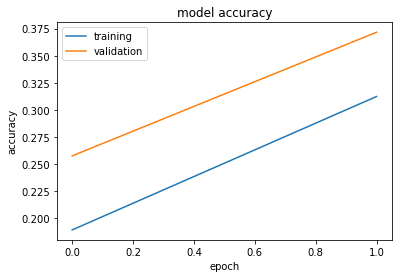

In [ ]:
# test case 1 for simple_interval_propagation
# keras mnist two layers NN model
# first layer has 32 nodes and sigmoid as activation function;
# second layer has 10 nodes(output classes) and sigmoid as activation function

# **************************************get the trained model contains the layers(ws, bs) and activation_functions****************************************************
# **************************************train the model************************************************************************
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# flatten
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# modification of y
import keras
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("the first 5 x_train values: " + str(x_train[:5]))
print("the first 5 y_train values: " + str(y_train[:5]))

from keras.layers import Dense
from keras.models import Sequential

image_size = x_train.shape[1]

# set the model
model = Sequential()

model.add(Dense(units=32, activation="sigmoid", input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation="sigmoid"))
model.summary()

# plot the losses
from matplotlib import pyplot as plt
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])
history=model.fit(x_train, y_train, batch_size=3000,epochs=2, verbose=0, validation_split=.1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
# save the model
# model.save("mnist_two_layer_80%.h5")
# reconstructed_model = keras.models.load_model("mnist_two_layer.h5")
# reconstructed_model.summary()
# ******************************************load the saved model*****************************************************************
# model_1 = keras.models.load_model("mnist_two_layer.h5")
# # ******************************************get layers***********************************************************************
# layers=[]
# for layer in model_1.layers:
#     layers.append(layer.get_weights())
# # *****************************************get activation_functions*************************************************************** 
# # print(type(model.layers[0].activation))
# # print(str(model.layers[0].activation))
# activation_functions = ["sigmoid", "sigmoid"]
# #*******************************************get input_min and input_max*******************************************************
# min_vec = x_train[0]
# max_vec = min_vec.copy()
# for i in range(len(min_vec)):
#     if max_vec[i] <= 250:
#         max_vec[i] = min_vec[i] + 5
#     else:
#         max_vec[i] = 255
# # ****************************************************************************************************************************
# outputMin, outputMax = simple_interval_propagation(layers, activation_functions, min_vec, max_vec)
# print("the output min vector is: \n" + str(outputMin))
# print("the output max vector is: \n" + str(outputMax))

In [21]:
# test case 2 for simple_interval_propagation
min_vec = np.array([[0.], [-2.]])
max_vec = np.array([[2.], [0.]])
w1 = np.array([[0.3, -0.4], [-0.2, 0.6]])
b1 = np.array([[0.],[0.]])
w2 = np.array([[0.1, 0.3], [-0.2, -0.4]])
b2 = np.array([[0.],[0.]])
activation_function1 = "sigmoid"
activation_function2 = "sigmoid"
layer1 = [w1, b1]
layer2 = [w2, b2]
layers = [layer1, layer2]
activation_functions = [activation_function1, activation_function2]
#******************************************************************************************************************
outputMin, outputMax = simple_interval_propagation(layers, activation_functions, min_vec, max_vec)
print("the output min vector is: \n" + str(outputMin))
print("the output max vector is: \n" + str(outputMax))

the output min vector is: 
[[0.4875026]
 [0.4875026]]
the output max vector is: 
[[0.51231383]
 [0.54280407]]


In [23]:
# test case 2 for simple_interval_propagation
min_vec = np.array([[0.], [-2.]])
max_vec = np.array([[2.], [0.]])
w1 = np.array([[0.3, -0.4], [-0.2, 0.6]])
b1 = np.array([[0.],[0.]])
w2 = np.array([[0.1, 0.3], [-0.2, -0.4]])
b2 = np.array([[0.],[0.]])
activation_function1 = "relu"
activation_function2 = "relu"
layer1 = [w1, b1]
layer2 = [w2, b2]
layers = [layer1, layer2]
activation_functions = [activation_function1, activation_function2]
#******************************************************************************************************************
outputMin, outputMax = simple_interval_propagation(layers, activation_functions, min_vec, max_vec)
print("the output min vector is: \n" + str(outputMin))
print("the output max vector is: \n" + str(outputMax))

the output min vector is: 
[[0.]
 [0.]]
the output max vector is: 
[[0.1]
 [0.3]]


In [29]:
# test case 3 for simple_interval_propagation
min_vec = np.array([[0.], [-2.]])
max_vec = np.array([[2.], [0.]])
w1 = np.array([[0.3, -0.4], [-0.2, 0.6]])
b1 = np.array([[0.],[0.]])
w2 = np.array([[0.1, 0.3], [-0.2, -0.4]])
b2 = np.array([[0.],[0.]])
w3 = np.array([[0.1, 0.3, 0.5], [-0.2, -0.4, -0.6]])
b3 = np.array([[0.01],[0.02],[0.03]])
activation_function1 = "relu"
activation_function2 = "relu"
activation_function3 = "none"
layer1 = [w1, b1]
layer2 = [w2, b2]
layer3 = [w3, b3]
layers = [layer1, layer2, layer3]
activation_functions = [activation_function1, activation_function2, activation_function3]
#******************************************************************************************************************
outputMin, outputMax = simple_interval_propagation(layers, activation_functions, min_vec, max_vec)
print("the output min vector is: \n" + str(outputMin))
print("the output max vector is: \n" + str(outputMax))

the output min vector is: 
[[-0.05]
 [-0.1 ]
 [-0.15]]
the output max vector is: 
[[0.02]
 [0.05]
 [0.08]]


In [7]:
# test case 4 for simple_interval_propagation
# input minimum verctor is add 5 to non zero pixels.
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# flatten
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# modification of y
import keras
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("the first 5 x_train values:\n " + str(x_train[:5]))
print("the first 5 y_train values:\n " + str(y_train[:5]))

# ******************************************load the saved model*****************************************************************
model_1 = keras.models.load_model("mnist_two_layer.h5")
# ******************************************get layers***********************************************************************
layers=[]
for layer in model_1.layers:
    layers.append(layer.get_weights())
# *****************************************get activation_functions*************************************************************** 
# print(type(model.layers[0].activation))
# print(str(model.layers[0].activation))
activation_functions = ["sigmoid", "sigmoid"]
#*******************************************get input_min and input_max*******************************************************
min_vec = x_train[0]
max_vec = min_vec.copy()
for row in range(min_vec.shape[0]):
    if min_vec[row] <= 250 and min_vec[row] != 0:
        max_vec[row] = min_vec[row] + 5
    elif min_vec[row] > 250:
        max_vec[row] = 255
# ****************************************************************************************************************************
outputMin, outputMax = simple_interval_propagation(layers, activation_functions, min_vec, max_vec)
print("the output min vector is: \n" + str(outputMin))
print("the output max vector is: \n" + str(outputMax))

the first 5 x_train values:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the first 5 y_train values:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   

In [10]:
# test case 5 for simple_interval_propagation
# input minimum verctor is add 55 to non zero pixels.
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# flatten
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# modification of y
import keras
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("the first 5 x_train values:\n " + str(x_train[:5]))
print("the first 5 y_train values:\n " + str(y_train[:5]))

# ******************************************load the saved model*****************************************************************
model_1 = keras.models.load_model("mnist_two_layer.h5")
# ******************************************get layers***********************************************************************
layers=[]
for layer in model_1.layers:
    layers.append(layer.get_weights())
# *****************************************get activation_functions*************************************************************** 
# print(type(model.layers[0].activation))
# print(str(model.layers[0].activation))
activation_functions = ["sigmoid", "sigmoid"]
#*******************************************get input_min and input_max*******************************************************
min_vec = x_train[0]
max_vec = min_vec.copy()
for row in range(min_vec.shape[0]):
    if min_vec[row] <= 200 and min_vec[row] != 0:
        max_vec[row] = min_vec[row] + 55
    elif min_vec[row] > 200:
        max_vec[row] = 255
# ****************************************************************************************************************************
outputMin, outputMax = simple_interval_propagation(layers, activation_functions, min_vec, max_vec)
print("the output min vector is: \n" + str(outputMin))
print("the output max vector is: \n" + str(outputMax))

the first 5 x_train values:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
the first 5 y_train values:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
the output min vector is: 
[[0.07126427]
 [0.04968111]
 [0.09156656]
 [0.26004844]
 [0.00984265]
 [0.625299  ]
 [0.06294502]
 [0.0771286 ]
 [0.10935523]
 [0.03884521]]
the output max vector is: 
[[0.96439438]
 [0.80227413]
 [0.96312502]
 [0.9688933 ]
 [0.65990788]
 [0.98597165]
 [0.93162529]
 [0.92323979]
 [0.95224365]
 [0.71914605]]


In [2]:
# test case 1 for split_2()
min_vec = np.array([[70.], [7.]])
max_vec = np.array([[90.], [20.]])
region1=[]
region2=[]

region1, region2 = split_2(min_vec, max_vec)

print(region1[0])
print(region1[1])
print(region2[0])
print(region2[1])

[[70.]
 [ 7.]]
[[80.]
 [20.]]
[[80.]
 [ 7.]]
[[90.]
 [20.]]


In [5]:
# test case 2 for split_2()
min_vec = np.array([[1.], [1.],[1.]])
max_vec = np.array([[4.], [4.],[50.]])
region1=[]
region2=[]

region1, region2 = split_2(min_vec, max_vec)

print(region1[0])
print(region1[1])
print(region2[0])
print(region2[1])


AssertionError: 